<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

Дані про продаж будинків

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/AmesHousing.csv",
                 index_col=0)

# Завдання 1
Виведіть основіні числові характеристики, кількість пропущенних значень для кожного стовпчика

In [3]:
numeric_summary = df.describe()

missing_values = df.isnull().sum()

print("Основні числові характеристики:")
print(numeric_summary)
print("\nКількість пропущених значень для кожного стовпчика:")
print(missing_values)

Основні числові характеристики:
                PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.930000e+03  2930.000000   2440.000000    2930.000000   2930.000000   
mean   7.144645e+08    57.387372     69.224590   10147.921843      6.094881   
std    1.887308e+08    42.638025     23.365335    7880.017759      1.411026   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7440.250000      5.000000   
50%    5.354536e+08    50.000000     68.000000    9436.500000      6.000000   
75%    9.071811e+08    70.000000     80.000000   11555.250000      7.000000   
max    1.007100e+09   190.000000    313.000000  215245.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   
mean       5.563140  1971.356314     1984.266553    101.896801    442.629566   
std        1.111

# Завдання 2
Розділіть дані на тестові та тренувальні(цільова ознака `SalePrice`)

In [5]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір тренувальних даних:", X_train.shape, y_train.shape)
print("Розмір тестових даних:", X_test.shape, y_test.shape)

Розмір тренувальних даних: (2344, 80) (2344,)
Розмір тестових даних: (586, 80) (586,)


# Завдання 3
Створіть препроцесор для заповнення пропусків та натренуйте його

In [7]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'B...
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])

# Завдання 4
Створіть модель та натренуйте її

In [8]:
model = RandomForestRegressor(random_state=42)

model.fit(preprocessor.transform(X_train), y_train)

RandomForestRegressor(random_state=42)

# Завдання 5
Виведіть метрики, важливість онак та графік метрик на тренувальних та тестових даних

Train RMSE: 10047.934163283033
Test RMSE: 26187.024044149708
Train R^2: 0.98301960817819
Test R^2: 0.9144675860751316

Top 10 Features by Importance:
          Feature  Importance
4    Overall Qual    0.601324
16    Gr Liv Area    0.102980
13     1st Flr SF    0.034063
12  Total Bsmt SF    0.026810
14     2nd Flr SF    0.023417
9    BsmtFin SF 1    0.022387
19      Full Bath    0.016713
3        Lot Area    0.015235
26    Garage Cars    0.014681
27    Garage Area    0.014054


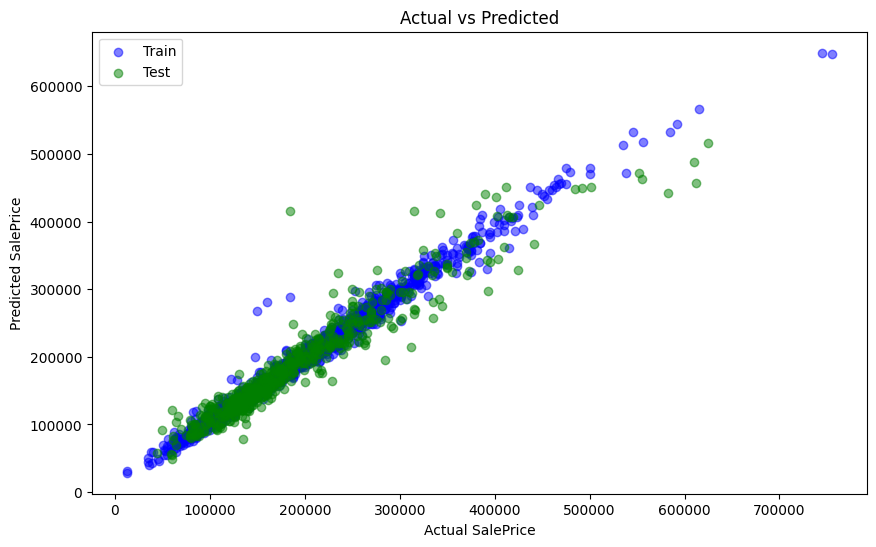

In [9]:
y_train_pred = model.predict(preprocessor.transform(X_train))
y_test_pred = model.predict(preprocessor.transform(X_test))

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

feature_importances = model.feature_importances_
features = numeric_features.tolist() + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

print("\nTop 10 Features by Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test')
plt.title('Actual vs Predicted')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.show()

# Завдання 6
Об'єднайте препроцесор та натреновану модель і збережіть її

In [10]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

joblib.dump(pipeline, 'house_price_prediction_model.pkl')

['house_price_prediction_model.pkl']